# <span style="color:orange"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue"> Numerical exercise 2 </span>


### <font color="green"> Exercise 2.1

In this exercise we want to compute the integral $ I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1 $ via Montecarlo:
  

  1. sampling a uniform distribution [0,1];
  2. using importance sampling.

For step 2, I performed a first-order Taylor expansion of the integrand function and found the function 
$$
g(x)=2(x -1)
$$ 
We can then improve our integral by calculating it as 
$$
I= \int_0^1 \frac{f(x)}{g(x)}g(x)dx \approx  \frac{1}{N} \sum_i\frac{f(x_i)}{g(x_i)} ,
$$

$x_i$ is obtained first generating a random number $y_i$ from a uniform distribution sampled in $[0,1]$ and then calculating the inverse of cumulative distribution of $g(x):-> F^{-1}(y) $.

$$
x_i = F^{-1}e(y_i) = 1 - \sqrt{1-y_i}
$$
integral

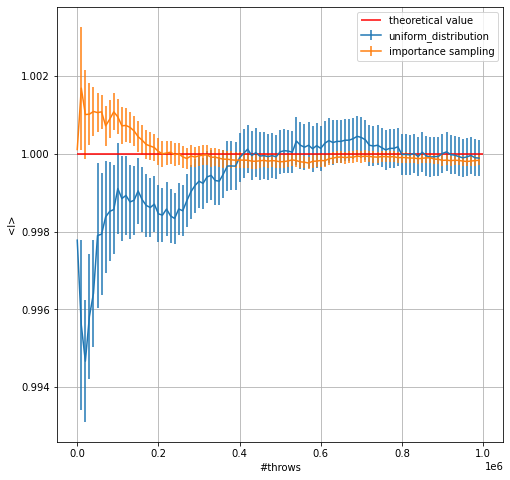

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000000
N=100
L=int(M/N)
x = np.arange(N) 

x*=L
plt.figure(figsize=(8,8))
sum_prog, error = np.loadtxt("intUnif.dat", usecols=(0,1), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=error, label = "uniform_distribution")

sumT_prog, errorT = np.loadtxt("intTayl.dat", usecols=(0,1), unpack = 'true')
plt.errorbar(x,sumT_prog,yerr=errorT, label = "importance sampling")

plt.hlines(1,0,M, color = "red", label ="theoretical value")

plt.xlabel('#throws')
plt.legend()
plt.ylabel('<I>')
plt.grid(True)

plt.show()

As we can clearly see in the graph above the importance sampling method is much better for the convergence of the integral!

### <font color = "green"> Exercise 2.2
In this exercise we perform the simulation of a 3D Random Walk in a cubic lattice and in the continuum and graphically represent $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both walks, with their statistical uncertaintines as function of the number of steps ($10^2$).
We finally fit the results with a function like $k\sqrt{N}$ in order to recognize a diffusive behaviour.

Lattice: 
optimized parameters k =  [0.9992]
parameters uncertainty =  [0.0001]

Continuum:
optimized parameters k =  [0.9986]
parameters uncertainty =  [0.0002]


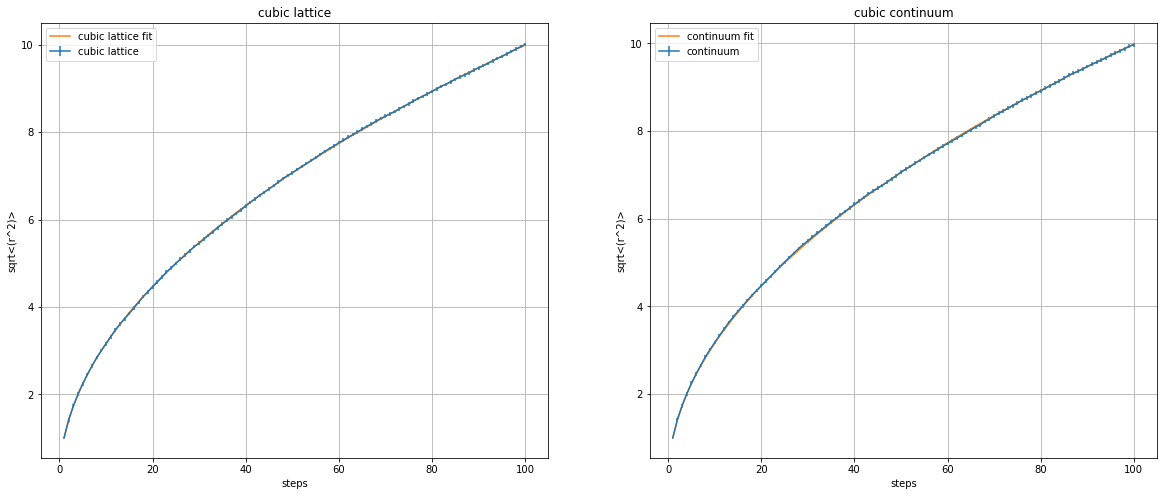

In [6]:
from scipy.optimize import curve_fit

rad_prog, errorrad = np.loadtxt("Discrete_RW.dat", usecols=(0,1), unpack = 'true')
cont_rad, cont_err = np.loadtxt("Continue_RW.dat", usecols=(0,1), unpack = 'true')
z = np.arange(100) +1

def f(x,k):
    return k*np.sqrt(x)

#lattice fit parameters
p_opt, p_cov = curve_fit(f,z, rad_prog[z>0])
y_fit = f(z ,p_opt)
#continuum fit pstatisticalarameters
pc_opt, pc_cov = curve_fit(f,z, cont_rad[z>0])
yc_fit = f(z ,pc_opt)


fig = plt.figure(figsize =(20,8) )

print("Lattice: ")
print("optimized parameters k = ",np.round(p_opt,4))
print("parameters uncertainty = ",np.round(np.sqrt(np.diagonal(p_cov)),4))

plt.subplot(1,2,1, title = "cubic lattice")
plt.errorbar(z ,rad_prog,yerr=errorrad, label= "cubic lattice")
plt.plot(z,y_fit, label= "cubic lattice fit") # plotting fitted function
plt.legend(loc = "best")
plt.xlabel('steps')
plt.ylabel('sqrt<(r^2)>')
plt.grid(True)

print()
print("Continuum:")
print("optimized parameters k = ",np.round(pc_opt,4))
print("parameters uncertainty = ",np.round(np.sqrt(np.diagonal(pc_cov)),4))
plt.subplot(1,2,2, title = "cubic continuum")
plt.errorbar(z ,cont_rad , yerr=cont_err , label = "continuum")
plt.plot(z,yc_fit, label= "continuum fit") # plotting fitted function
plt.xlabel('steps')
plt.ylabel('sqrt<(r^2)>')
plt.grid(True)
plt.legend(loc = "best")
plt.show()

The result is what we expected: both random walks follow a diffusive pattern proportional to the root of the number of blocks.
